In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [3]:
source_folder = "/Users/hrushikeshnayak/Desktop/assignment/CNN/train"


cat_folder = "/Users/hrushikeshnayak/Desktop/assignment/CNN/Dataset/cats"
dog_folder = "/Users/hrushikeshnayak/Desktop/assignment/CNN/Dataset/dogs"


os.makedirs(cat_folder, exist_ok=True)
os.makedirs(dog_folder, exist_ok=True)


for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    if "cat" in filename:
        
        destination_path = os.path.join(cat_folder, filename)
        if not os.path.exists(destination_path):  
            shutil.copy2(source_path, destination_path)
    elif "dog" in filename:
       
        destination_path = os.path.join(dog_folder, filename)
        if not os.path.exists(destination_path):  
            shutil.copy2(source_path, destination_path)


In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from keras.layers import Dense, Flatten 
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
import keras

In [5]:
base_model = InceptionV3(input_shape = (256, 256 , 3) , include_top = False)

In [6]:
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)


for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=2, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 127, 127, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 127, 127, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 127, 127, 32)         0         ['batch_normalization_94[0

In [8]:
train_datasen = ImageDataGenerator(featurewise_center=True , rotation_range=0.4 , width_shift_range= 0.3 , horizontal_flip=True , preprocessing_function=preprocess_input , zoom_range= 0.4 , shear_range=0.4)

train_data = train_datasen.flow_from_directory(directory='/Users/hrushikeshnayak/Desktop/assignment/CNN/Dataset' , target_size=(256 , 256) , batch_size=64)


Found 25000 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
t_img , label = train_data.next()

In [11]:
t_img.shape

(64, 256, 256, 3)

In [12]:
def plotImage(img_arr , label):
    for idx , img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


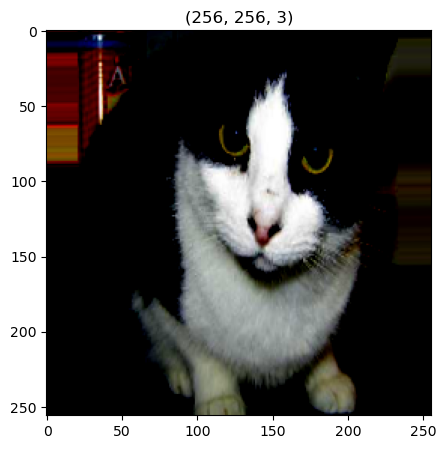

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


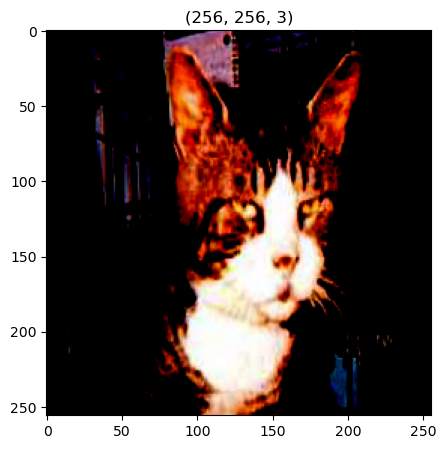

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


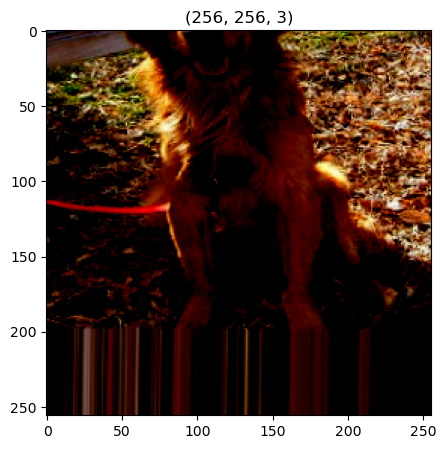

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


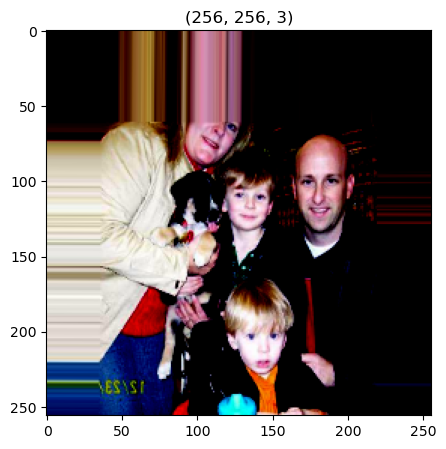

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


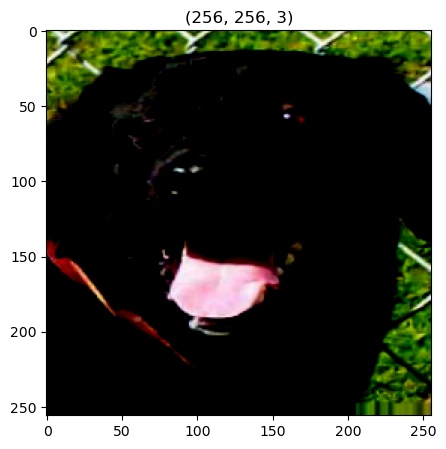

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


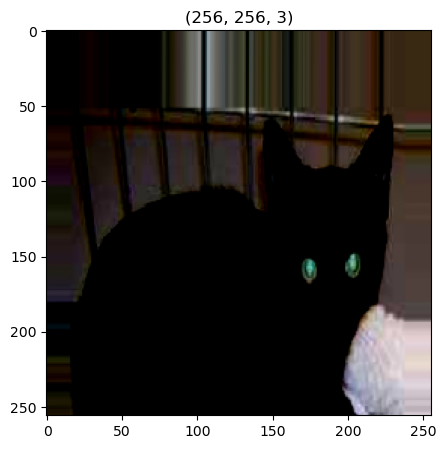

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


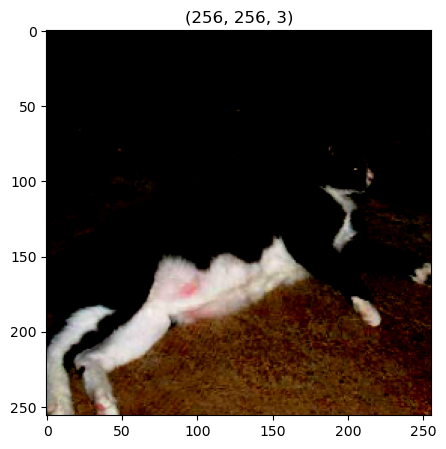

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


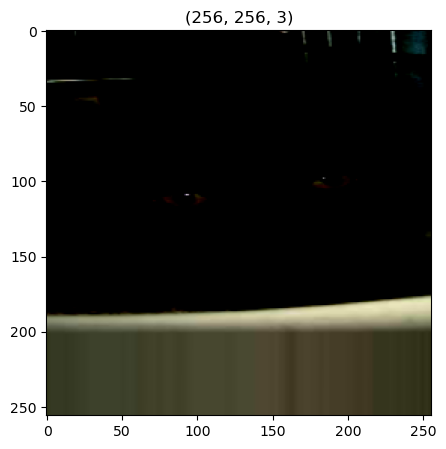

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


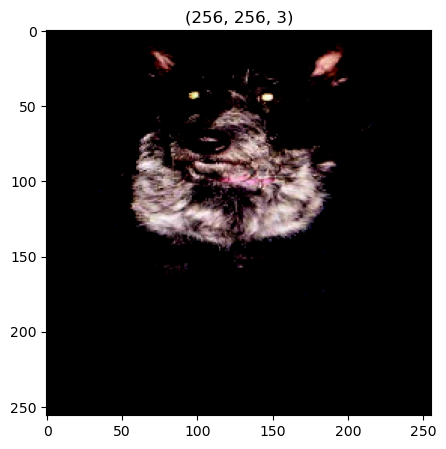

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


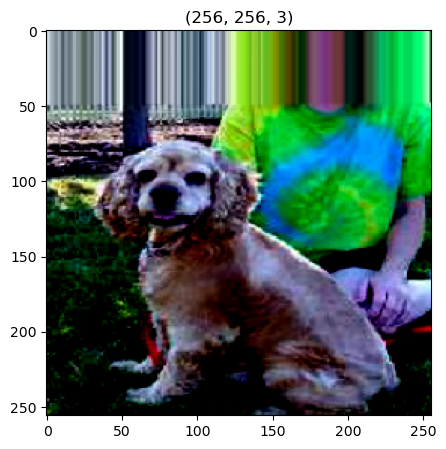

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


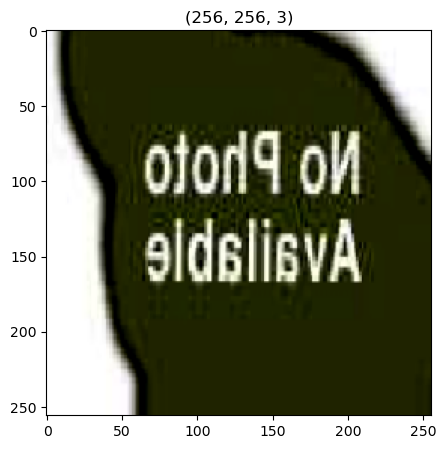

In [13]:
plotImage(t_img , label)

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


mc = ModelCheckpoint(filepath="/Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5",
                     monitor="accuracy",
                     verbose=1,
                     save_best_only=True)

es = EarlyStopping(monitor="accuracy",
                   min_delta=0.01,
                   patience=5,
                   verbose=1)

cb = [mc, es]


In [15]:
his = model.fit_generator(train_data, steps_per_epoch= 10 , epochs= 30, callbacks= cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.8672
Epoch 1: accuracy improved from -inf to 0.86719, saving model to /Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 0.6914 - accuracy: 0.8672
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.9297
Epoch 2: accuracy improved from 0.86719 to 0.92969, saving model to /Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 0.6311 - accuracy: 0.9297
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.9625
Epoch 3: accuracy improved from 0.92969 to 0.96250, saving model to /Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5
10/10 [==============================] - 21s 2s/step - loss: 0.3817 - accuracy: 0.9625
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.3615 -

In [16]:
from keras.models import load_model
model = load_model("/Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5")

1/1 [==============================] - 0s 53ms/step
The image is of a dog


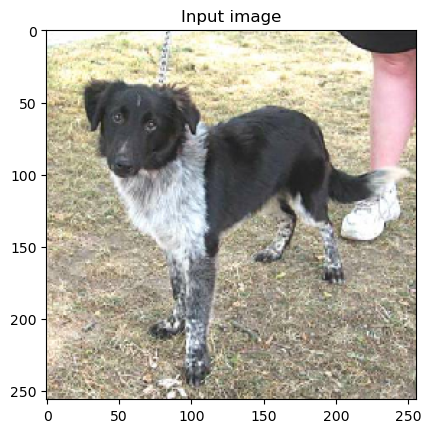

In [30]:

path = "/Users/hrushikeshnayak/Desktop/assignment/CNN/test1/12487.jpg"

# Load and preprocess the image
img = load_img(path, target_size=(256, 256))
i = img_to_array(img)
input_arr = np.array([i])

pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("The image is of a cat")
else:
    print("The image is of a dog")

# Display the input image
plt.imshow(input_arr[0] / 255)  
plt.title("Input image")
plt.show()
